In [33]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('./data/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
# Задание 7.2

# Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков
# в данных?
display(df.isna().sum().sum())
df.isna().sum()

314

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Задание 7.3

# Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM PAYMENTS
# (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.
df.fillna(df.mean(), inplace=True)
df['MINIMUM_PAYMENTS'].mean().round(2)

864.21

In [6]:
# Задание 7.4

# Теперь нормализуйте данные с помощью StandardScaler (). Для получившейся матрицы нормализованных признаков выведите самое
# первое значение в самой первой строке (X norm[0] [0]). Округлите до двух знаков после точки-разделителя.

# Не забудьте предварительно удалить признак CUST ID - он не поможет при кластеризации, так как не несёт никакой содержательной
# иноормации.
data = df.copy()
data.drop(['CUST_ID'], axis=1, inplace=True)

scaller = StandardScaler()
X_norm = scaller.fit_transform(data)

round(X_norm[0][0],2)

-0.73

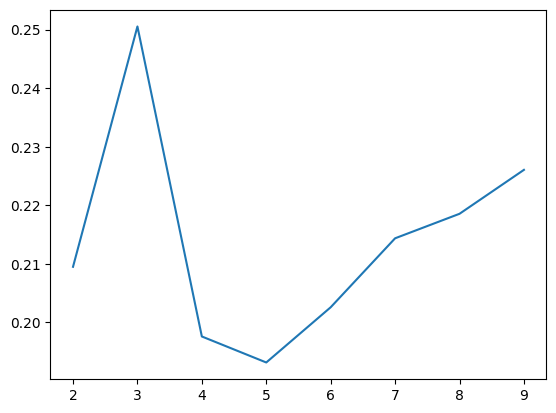

In [13]:
# Задание 7.5

# Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода - k-means. Для того чтобы его применить,
# необходимо узнать число кластеров. Наилучший способ сделать это - применить коэффициент силуэта. Найдите с его помощью оптимальное
# количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём
# значение 42.

clusters_diap = [x for x in range(2,10)]
sil_scores = []

for cluster in clusters_diap:
    km_clust = KMeans(n_clusters=cluster, random_state=42)
    km_clust.fit_predict(X_norm)
    sil_scores.append(silhouette_score(X_norm, km_clust.labels_))

silhouette = sns.lineplot(
    x=clusters_diap,
    y=sil_scores
);


In [14]:
# Задание 7.6

# Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем
# задании.
# Сколько человек оказалось в самой малочисленной группе?
km_df = df.copy()

km_model = KMeans(n_clusters=3, random_state=42)
km_model.fit_predict(X_norm)

km_df['cluster'] = km_model.labels_

km_df['cluster'].value_counts()

0    6118
1    1597
2    1235
Name: cluster, dtype: int64

In [21]:
# Задание 7.7

# Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.
# Сколько кластеров было выделено?

db_base_df = df.copy()
db_base = DBSCAN()
db_base.fit_predict(X_norm)

db_base_df['cluster'] = db_base.labels_
db_base_df['cluster'].nunique() + (-1) 

38

In [32]:
# Задание 7.8

# В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а
# результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.
# Давайте попробуем с помощью цикла перебрать параметр ер по значениям, заданным как пр. arange (0.1,3, 0.2), а параметр min samples
# по значениям, заданным как range (1, 20, 4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

eps = np.arange(0.1, 3, 0.2)
min_samples = range(1, 20, 4)
sil_scores = []

for i in eps:
    for j in min_samples:
        db_search = DBSCAN(eps=i, min_samples=j)
        db_search.fit_predict(X_norm)
        score = silhouette_score(X_norm, db_search.labels_)
        sil_scores.append((i, j, score))

sil_df = pd.DataFrame(sil_scores, columns=['eps', 'min_samples', 'score'])
sil_df.sort_values(by='score')

,eps,min_samples,score
11,0.5,5,-0.443701
16,0.7,5,-0.438837
6,0.3,5,-0.424475
7,0.3,9,-0.404209
30,1.3,1,-0.399305
...,...,...,...
74,2.9,17,0.591924
66,2.7,5,0.592182
73,2.9,13,0.595399
72,2.9,9,0.603811


<AxesSubplot: >

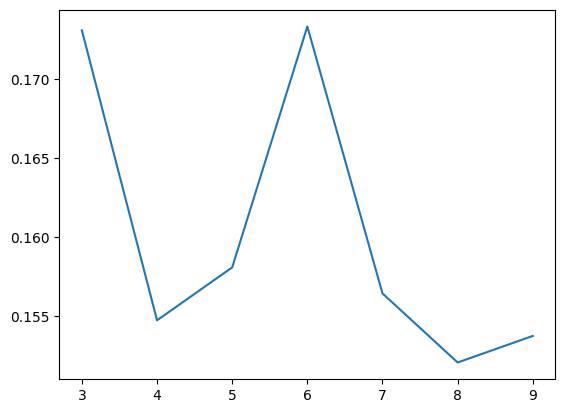

In [38]:
# Задание 7.9

# Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9
# включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

clusters = [x for x in range(3,10)]
sil_score = []

for cluster in clusters:
    agglo_search = AgglomerativeClustering(n_clusters=cluster)
    agglo_search.fit_predict(X_norm)
    score = silhouette_score(X_norm, agglo_search.labels_)
    sil_score.append(score)

sns.lineplot(
    x=clusters,
    y=sil_score
)

In [39]:
# Задание 7.10

# Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической
# кластеризации с количеством кластеров, полученным в предыдущем задании?
agglo_df = df.copy()

agglo = AgglomerativeClustering(n_clusters=6)
agglo.fit_predict(X_norm)

agglo_df['clusters'] = agglo.labels_
agglo_df['clusters'].value_counts()

0    3946
1    2931
2     864
5     722
3     464
4      23
Name: clusters, dtype: int64